# Implementing Linear Regression in Python

## 1. Importing Required Packages

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
%matplotlib inline

# Univariate Trial Data

Data has been taken from the linear regression assignment in Coursera

## 2. Importing the Data

In [28]:
df = pd.read_csv("./ex1data1.txt", names = ["Population of City in 10,000s", "Profit in $10,000s"])

Input Variable / feature (x) is population of City in 10,000s and Output/target variable (y) is Profit in $10,000

In [29]:
df.head()

,"Population of City in 10,000s","Profit in $10,000s"
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


## 3. Plotting to show the relationship 

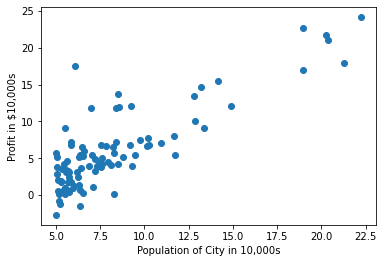

In [30]:
plt.scatter(df.iloc[:, 0], df.iloc[:, 1])
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[1])
plt.show()

In [31]:
def hypothesis(x, theta):
    return (theta[0] + theta[1] * x)

def uni_mse(x, y, theta):
    squared_sum = 0
    m = y.size
    for i_th in range(x.size):
        squared_sum += np.square(hypothesis(x[i_th], theta) - y[i_th])
    return (1/ (2*m) * squared_sum)
    


In [32]:
x = df.iloc[:, 0]
y = df.iloc[:, 1]
theta = [-1, 2]

In [33]:
np.square((hypothesis(x[0], theta) - y[0]))

40.59983523999998

In [34]:
uni_mse(x, y, theta)

54.24245508201238

In [86]:
# Define the range of theta 0 and theta 1, where the cost will be visualized 
theta0_val = np.linspace(-10, 10, 100)
theta1_val = np.linspace(-1, 4, 100)

# Set up zero matrix, so that the combination of each theta 0 and theta 1 can generate the error
J_vals = np.zeros((theta0_val.size, theta1_val.size))

for i in range(theta0_val.size):
    for j in range(theta1_val.size):
        theta = [theta0_val[i], theta1_val[j]]
        J_vals[i, j] = uni_mse(x, y, theta)
        

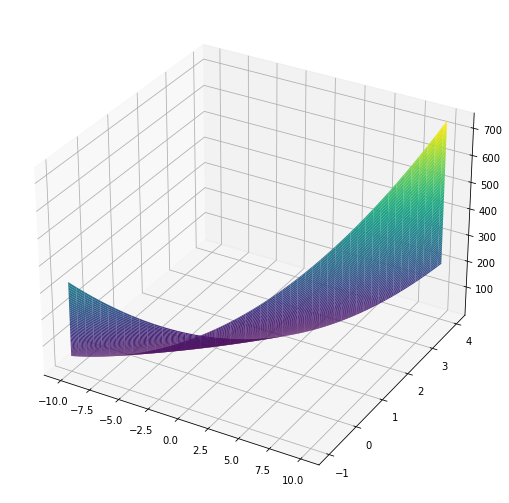

In [87]:
fig = plt.figure(figsize = (9,9))
ax = plt.axes(projection='3d')
ax.plot_surface(theta0_val, theta1_val, J_vals, cmap='viridis')
#ax.view_init(azim = 50)
plt.show()

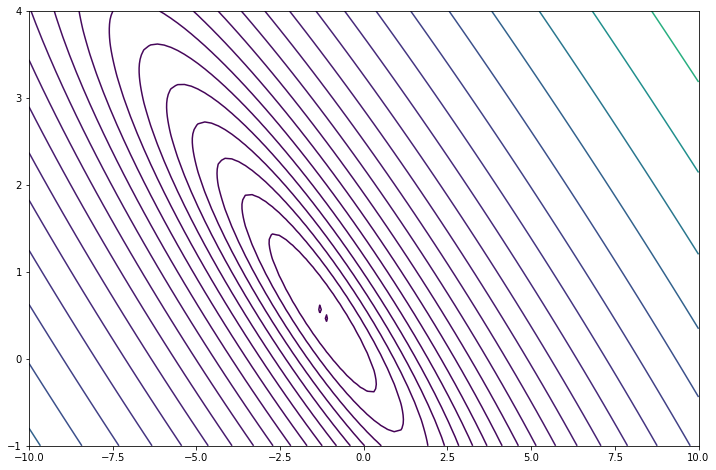

In [101]:
X, Y = np.meshgrid(theta0_val, theta1_val)
fig,ax=plt.subplots(1,1, figsize=(12,8))
ax.contour(X, Y, J_vals, np.logspace(-2, 3))
plt.show()

# Data 2 (Actual Data)

## 2. Import Data
Housing price in Portland, Oregon

In [102]:
df_2 = pd.read_csv("./ex1data2.txt", names = ["Size of the house (in sq. ft.)", "# of bedrooms", "Price of the house"])

In [103]:
df_2.head()

,Size of the house (in sq. ft.),# of bedrooms,Price of the house
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [104]:
m, n = df_2.shape

In [105]:
# Check m (number of training example)
print(m)
# check n (Number of feature)
n -=1 # 1 Column is not a feature. It is the column with the value of predictor variable
print(n)

47
2


## 3. Plotting to show the Linear Relationship

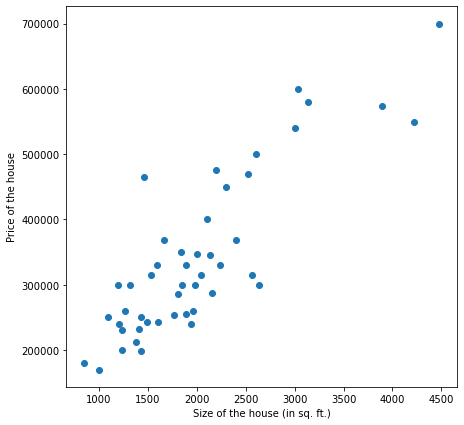

In [106]:
width, height = [7,7]
fig = plt.figure(figsize=(width,height))
plt.scatter(df_2.iloc[:, 0], df_2.iloc[:, 2])
plt.xlabel(df_2.columns[0])
plt.ylabel(df_2.columns[2])
plt.show()

Adding additional feature "# of bathrooms" can be shown as below

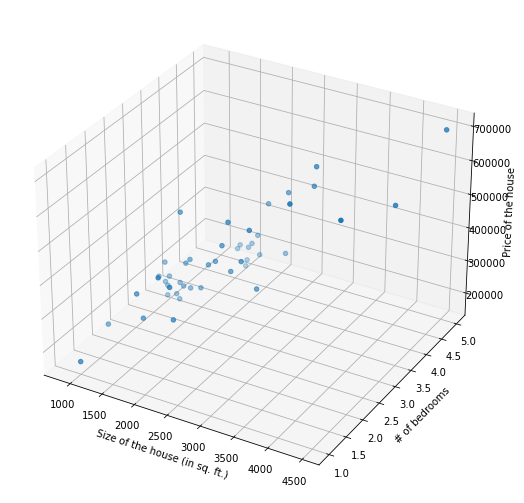

In [108]:
width, height = [9,9]
fig = plt.figure(figsize=(width,height))
ax = fig.add_subplot(projection='3d')
ax.scatter(df_2.iloc[:, 0], df_2.iloc[:, 1], df_2.iloc[:, 2])

# Labels of axis 
ax.set_xlabel(df_2.columns[0])
ax.set_ylabel(df_2.columns[1])
ax.set_zlabel(df_2.columns[2])
plt.show()

## Univariate 
This will use Size of the house in (sq. ft) as a input variable and price of the house as target variable

## 3. Define $x,\theta, y$

In [109]:
x = df_2.iloc[:, 0]
theta = [0, 0]
y = df_2.iloc[:, 2]

## 4. Define Hypothesis
$h(x) = \theta_0 + \theta_1 * x$

In [110]:
def hypothesis(x, theta):
    return (theta[0] + theta[1] * x)

## 5. Calculate Cost
Define function J

$J(\theta_0,\theta_1) = \frac{1}{2m} \sum _{i=1}^m (h(x^{(i)}) - y^{(i)})^2$

In [111]:
def uni_mse(x, y, theta):
    squared_sum = 0
    m = y.size
    for i_th in range(x.size):
        squared_sum += np.square(hypothesis(x[i_th], theta) - y[i_th])
    return (1/ (2*m) * squared_sum)
    

In [112]:
uni_mse(x, y, theta)

65591548106.45744

### 6. Visualize the cost function 
This gives the appropriate indication and example, that using MSE error gives the global minima, meaning that there is only one minimum point possible. 

Inspired by the examplary code from Coursera

In [113]:
# Define the range of theta 0 and theta 1, where the cost will be visualized 
theta0_val = np.linspace(-10, 10, 100)
theta1_val = np.linspace(-1, 4, 100)

# Set up zero matrix, so that the combination of each theta 0 and theta 1 can generate the error
J_vals = np.zeros((theta0_val.size, theta1_val.size))

for i in range(theta0_val.size):
    for j in range(theta1_val.size):
        theta = [theta0_val[i], theta1_val[j]]
        J_vals[i, j] = uni_mse(x, y, theta)
        

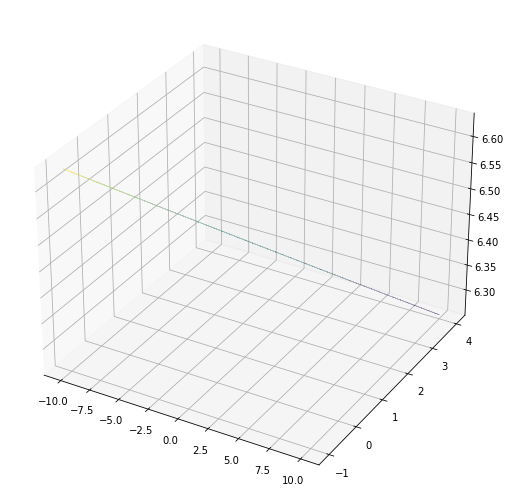

In [114]:
fig = plt.figure(figsize = (9,9))
ax = plt.axes(projection='3d')
ax.plot_surface(theta0_val, theta1_val, J_vals, cmap='viridis')
#ax.view_init(azim = 50)
plt.show()

<ipython-input-115-7a6a41f18873>:3: UserWarning: No contour levels were found within the data range.
  ax.contour(X, Y, J_vals, np.logspace(-2, 3))


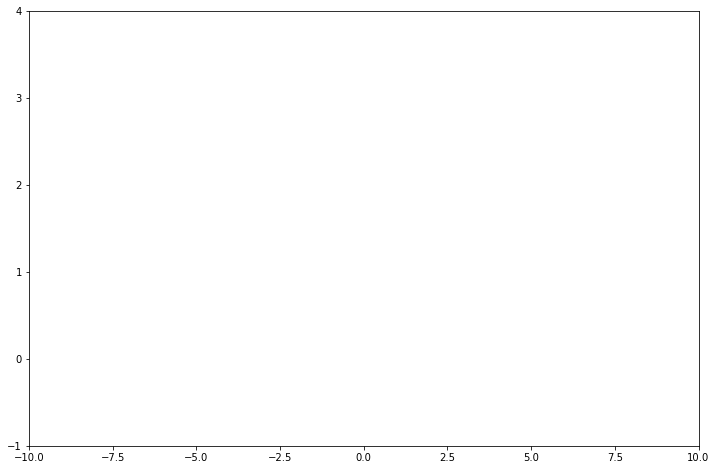

In [115]:
X, Y = np.meshgrid(theta0_val, theta1_val)
fig,ax=plt.subplots(1,1, figsize=(12,8))
ax.contour(X, Y, J_vals, np.logspace(-2, 3))
plt.show()

### 7. Gradient Descent

## Multivariate with vectorization